In [1]:
import napari
import zarr
import nd2
from glob import glob
import numpy as np
from PIL import Image
from natsort import natsorted

In [2]:
file = "100x_SB5_dilute002"
nd2_image = nd2.imread(file+".nd2")

In [3]:
segmentation = np.array([np.array(Image.open(x)) for x in natsorted(glob(f"../{file}_segmented/*"))])

In [4]:
if glob(f"{file}_curation.zarr"):
    print("Opening existing file")
    curation_position = zarr.open(f"{file}_curation.zarr", mode="r+")
else:
    print("Creating new file")
    curation_position = zarr.open(f"{file}_curation.zarr", mode='w', shape=(nd2_image.shape[0], nd2_image.shape[2], nd2_image.shape[3]), chunks=(1, nd2_image.shape[2], nd2_image.shape[3]), dtype=np.ubyte)

Creating new file


In [23]:
viewer = napari.view_image(nd2_image[:,0,:,:], rgb=False)
viewer.add_image(nd2_image[:,1,:,:], rgb=False)
labels_layer_2 = viewer.add_labels(segmentation, name = "segmentation")
labels_layer = viewer.add_labels(curation_position, name='curation')


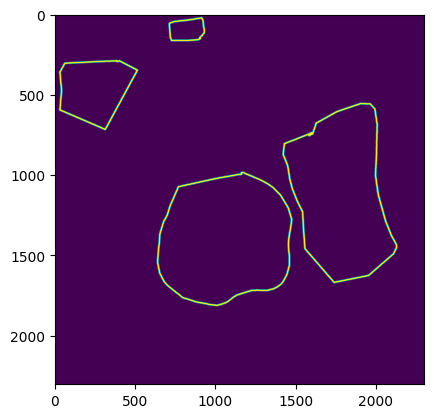

In [11]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import flood_fill
plt.imshow(curation_position[0])
centroids = [x.centroid for x in regionprops(label(curation_position[0]))]
curation = np.zeros_like(curation_position[0])
for x, y in centroids:
    x = int(x)
    y = int(y)
    curation += flood_fill(curation_position[0], (x,y), 1)
plt.imshow(curation > 0)

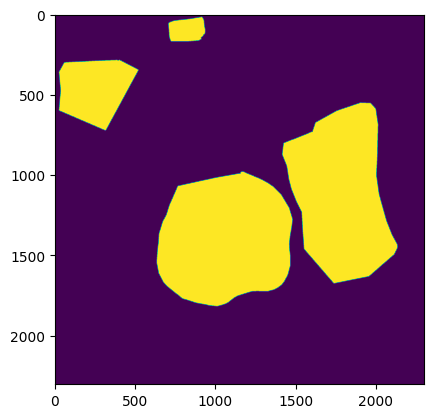

In [22]:
centroids = [x.centroid for x in regionprops(label(curation_position[0]))]
curation = np.zeros_like(curation_position[0])
for x, y in centroids:
    x = int(x)
    y = int(y)
    curation += flood_fill(curation_position[0], (x,y), 1)
plt.imshow(curation > 0)

In [15]:
centroids

[(97.60700717602364, 821.4346419023498),
 (470.07113650030067, 250.03920625375827),
 (1104.8785694982435, 1784.8562591958682),
 (1403.9946595017745, 1058.7907917869109)]